In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,2].values

Text(0.5, 1.0, 'Position Salary')

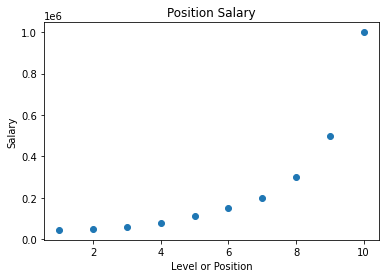

In [13]:
plt.scatter(X,y)
plt.xlabel('Level or Position')
plt.ylabel('Salary')
plt.title('Position Salary')

As we can see from the above visualization, the relation between position and salary is not linear

In [14]:
from sklearn.linear_model import LinearRegression
linearModel=LinearRegression()
linearModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

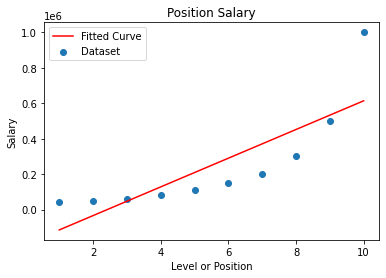

In [18]:
plt.scatter(X,y)
plt.plot(X,linearModel.predict(X),'r')
plt.xlabel('Level or Position')
plt.ylabel('Salary')
plt.title('Position Salary')
plt.legend(["Fitted Curve","Dataset"])

The above fitted curve is a line obtained through linear regression. For more accurate curve, we need to use polynomial regression model

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [27]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

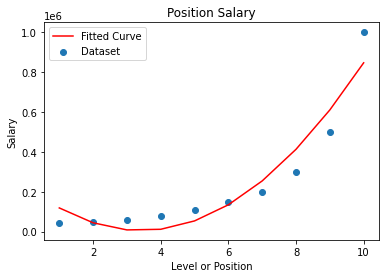

In [28]:
plt.scatter(X,y)
plt.plot(X,lin_reg_2.predict(X_poly),'r')
plt.xlabel('Level or Position')
plt.ylabel('Salary')
plt.title('Position Salary')
plt.legend(["Fitted Curve","Dataset"])

Now if we increase the degree to 4, we get better results

In [35]:
poly_reg_2=PolynomialFeatures(degree=4)
X_poly_2=poly_reg_2.fit_transform(X)
poly_reg.fit(X_poly_2)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [36]:
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

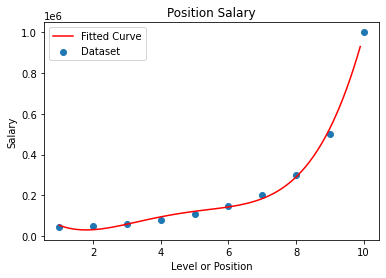

In [41]:
#For smooth curve
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)

plt.scatter(X,y)
plt.plot(X_grid,lin_reg_3.predict(poly_reg_2.fit_transform(X_grid)),'r')
plt.xlabel('Level or Position')
plt.ylabel('Salary')
plt.title('Position Salary')
plt.legend(["Fitted Curve","Dataset"])